In [1]:
%pylab inline
import torch

Populating the interactive namespace from numpy and matplotlib


(-0.04984685182571411,
 1.0479509472846984,
 -0.04942480325698853,
 1.0489567875862122)

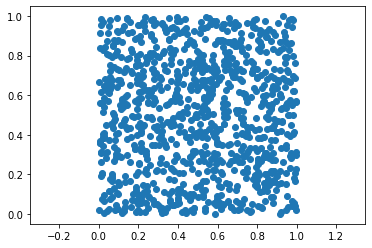

In [9]:
x = torch.rand([1000,2])
scatter(*x.numpy().T)
axis('equal')


(-0.04984685182571411,
 1.0479509472846984,
 -0.04942480325698853,
 1.0489567875862122)

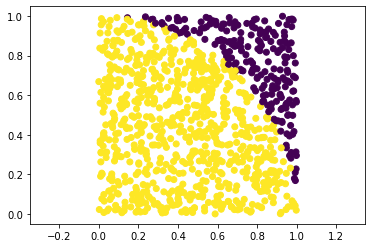

In [10]:
x_in_circle = (x**2).sum(1) < 1

scatter(*x.numpy().T, c=x_in_circle.numpy())
axis('equal')

accuracy tensor(0.2900)


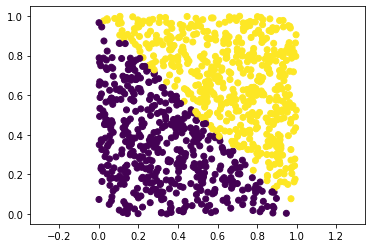

In [4]:
weights = torch.as_tensor([1,1], dtype=torch.float)
bias = torch.as_tensor(-1, dtype=torch.float)

def classify(x, weights, bias):
    return (x * weights[None,:]).sum(dim=1) + bias > 0

def accuracy(pred_label):
    return (pred_label==x_in_circle).float().mean()

def show(y):
    scatter(*x.numpy().T, c=y.detach().numpy())
    axis('equal')

pred_y = classify(x, weights, bias)
show(pred_y)
print('accuracy', accuracy(pred_y))

In [11]:
def predict(x, weights, bias):
    logit = (x * weights[None,:]).sum(dim=1) + bias
    return 1/(1+(-logit).exp())

def loss(prediction):
    return -(x_in_circle.float()     * (prediction+1e-10).log() +
             (1-x_in_circle.float()) * (1-prediction+1e-10).log() ).mean()

p_y = predict(x, weights, bias)
print( 'loss =', loss(p_y), 'accuracy =', accuracy(pred_y) )

loss = tensor(0.1250) accuracy = tensor(0.6590)


loss = tensor(0.5950) accuracy = tensor(0.7150)


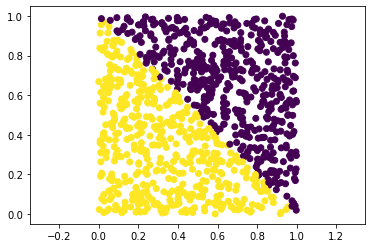

In [12]:
weights = torch.as_tensor([-1,-1], dtype=torch.float)
bias = torch.as_tensor(1.0, dtype=torch.float)

pred_y = classify(x, weights, bias)
p_y = predict(x, weights, bias)

show(pred_y)
print( 'loss =', loss(p_y), 'accuracy =', accuracy(pred_y) )

loss = tensor(0.5440) accuracy = tensor(0.8950)


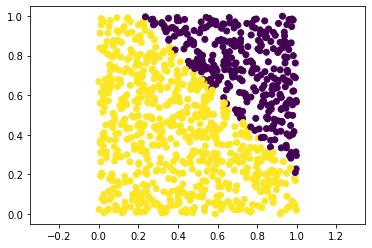

In [13]:
weights = torch.as_tensor([-1,-1], dtype=torch.float)
bias = torch.as_tensor(1.2, dtype=torch.float)

pred_y = classify(x, weights, bias)
p_y = predict(x, weights, bias)

show(pred_y)
print( 'loss =', loss(p_y), 'accuracy =', accuracy(pred_y) )

loss = tensor(0.1173) accuracy = tensor(0.9660)


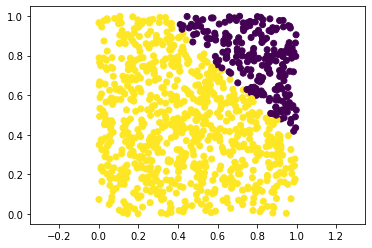

In [8]:
weights = torch.as_tensor([-1,-1], dtype=torch.float)
bias = torch.as_tensor(1.0, dtype=torch.float)
lr = 0.5
label = x_in_circle.float()
for iteration in range(5000):
    p_y = predict(x, weights, bias)
    pred_y = classify(x, weights, bias)
    l = loss(p_y)
    # Gradient computation
    gradient_l_f = p_y - label.float()
    gradient_w = (gradient_l_f[:,None]*x).mean(0)
    gradient_b = (gradient_l_f).mean(0)
    # Gradient update
    weights -= lr*gradient_w
    bias    -= lr*gradient_b

show(pred_y)
print( 'loss =', loss(p_y), 'accuracy =', accuracy(pred_y) )